In [1]:
from torchvision import disable_beta_transforms_warning

disable_beta_transforms_warning()
from quick_torch import Category, QuickDraw
import torchvision.transforms.v2 as T
import torch

# transform = T.Compose([
#     T.Resize(128),
# ])

transform = T.Compose([
    T.RandomHorizontalFlip(p=0.5),
    T.RandomZoomOut(side_range=(1, 1.25), p=0.3),
    T.Resize(32),
    T.RandomRotation(
        degrees=(-10, 10), interpolation=T.InterpolationMode.BILINEAR
    ),
    T.ToTensor(),
    T.ConvertImageDtype(torch.float16),
    T.Normalize(
        [0.5 for _ in range(1)],
        [0.5 for _ in range(1)],
    ),
])

categories = [Category.FACE, Category.SMILEY_FACE]

kwargs = dict(
    root="../dataset",
    categories=categories,
    train=True,
    download=True,
    recognized=True,
)
dataset = QuickDraw(transform=transform, **kwargs)
dataset[0][0]

/home/fmunoz/.virtualenvs/Bayesian-Learning-with-Wasserstein-Barycenters/lib/python3.12/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]], dtype=torch.float16)

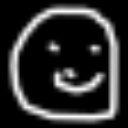

In [2]:
transform = T.Compose([
    T.RandomHorizontalFlip(p=1.0),
    T.Resize(128),
])
dataset = QuickDraw(transform=transform, **kwargs)
dataset[0][0]

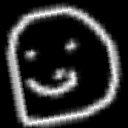

In [3]:
degrees = 10
transform = T.Compose([
    T.Resize(128),
    T.RandomRotation(degrees=(degrees, degrees)),
    # T.Resize(128),
])
dataset = QuickDraw(transform=transform, **kwargs)
dataset[0][0]

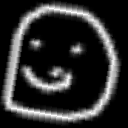

In [4]:
degrees = -10
transform = T.Compose([
    T.Resize(128),
    T.RandomRotation(degrees=(degrees, degrees)),
])
dataset = QuickDraw(transform=transform, **kwargs)
dataset[0][0]

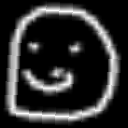

In [5]:
transform = T.Compose([
    T.Resize(128),
    T.RandomRotation(degrees=(-7, 7)),
])
dataset = QuickDraw(transform=transform, **kwargs)
dataset[0][0]

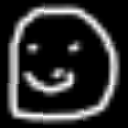

In [6]:
dataset[0][0]

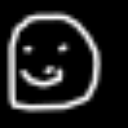

In [7]:
from copy import deepcopy

sr_min, sr_max = 1, 1.5
p = 0.5
transform = T.Compose([
    T.RandomZoomOut(side_range=(sr_min, sr_max), p=p),
    T.Resize(128),
])
transform2 = transform = T.Compose([
    T.RandomZoomOut(side_range=(sr_min, sr_max), p=p),
    T.Resize(128),
])
dataset1 = QuickDraw(transform=transform, **kwargs)
dataset2 = QuickDraw(transform=transform2, **kwargs)
dataset1[0][0]

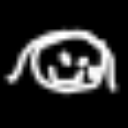

In [8]:
dataset2[1][0]

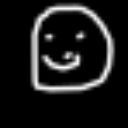

In [9]:
dataset1[0][0]

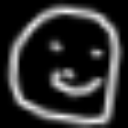

In [10]:
sr_min, sr_max = 1.0, 1.75
transform = T.Compose([
    T.RandomHorizontalFlip(p=0.5),
    T.RandomZoomOut(side_range=(1, 1.5)),
    T.RandomRotation(
        degrees=(-10, 10), interpolation=T.InterpolationMode.BILINEAR
    ),
    T.Resize(128),
])
dataset = QuickDraw(transform=transform, **kwargs)
dataset[0][0]

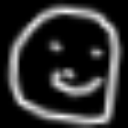

In [11]:
dataset[0][0]

In [18]:
import math
sigma = 2
k = 2 * int(3 * sigma) + 1
k

13

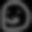

In [22]:
sigma = 2
k_size = 2 * math.ceil(3 * sigma) + 1
transform = T.Compose([
    T.Resize(32),
    T.GaussianBlur(kernel_size=k_size, sigma=sigma),
])
dataset = QuickDraw(transform=transform, **kwargs)
dataset[0][0]

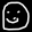

In [14]:
dataset[0][0]